In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sen=pd.read_csv('senado.csv')
cam=pd.read_csv('camara.csv')
pls=np.unique(sen.partido)
plc=np.unique(cam.partido)

In [3]:
abstp=pd.read_csv('participacion.csv')
absts=abstp[abstp.votacion=='senado']
abstc=abstp[abstp.votacion=='camara']
dep=np.unique(abstp.departamento)

In [4]:
vtfs=[]
dabs=[]
vtts=[]
pars=[]
deps=[]
for p in pls:
    for i in dep:
        ds=sen[sen.departamento==i]
        ads=absts[absts.departamento==i]
        dabs+=[100*(1-ads.votantes.sum()/ads.habilitados.sum())]
        vtfs+=[100*(ds.candidato_votos[ds.partido==p]).sum()/(ads.votantes-ads.votos_no_marcados).sum()]
        vtts+=[(ds.candidato_votos[ds.partido==p]).sum()]
        pars+=[p]
        deps+=[i]


In [5]:
d_s = {'Departamento': deps, 'Abstención - S (%)': dabs, 'Votos Totales - S':vtts, 'Fracción de Votos - S (%)':vtfs,'Partido':pars}
df_s = pd.DataFrame(data=d_s)

In [6]:
df1=df_s[df_s['Departamento']!='Consulados']

In [7]:
plis=['coalición lista de la decencia (asi,up,mais)',
       'partido alianza verde',
       'partido cambio radical', 'partido centro democrático',
       'partido conservador colombiano',
       'partido liberal colombiano', 
       'partido polo democrático alternativo', 'partido político mira',
       'partido social de unidad nacional partido de la u',]

In [8]:
fil1=df1.Partido=='votos en blanco'
for i in plis:
    fil1|=df1.Partido==i
df1=df1[fil1]

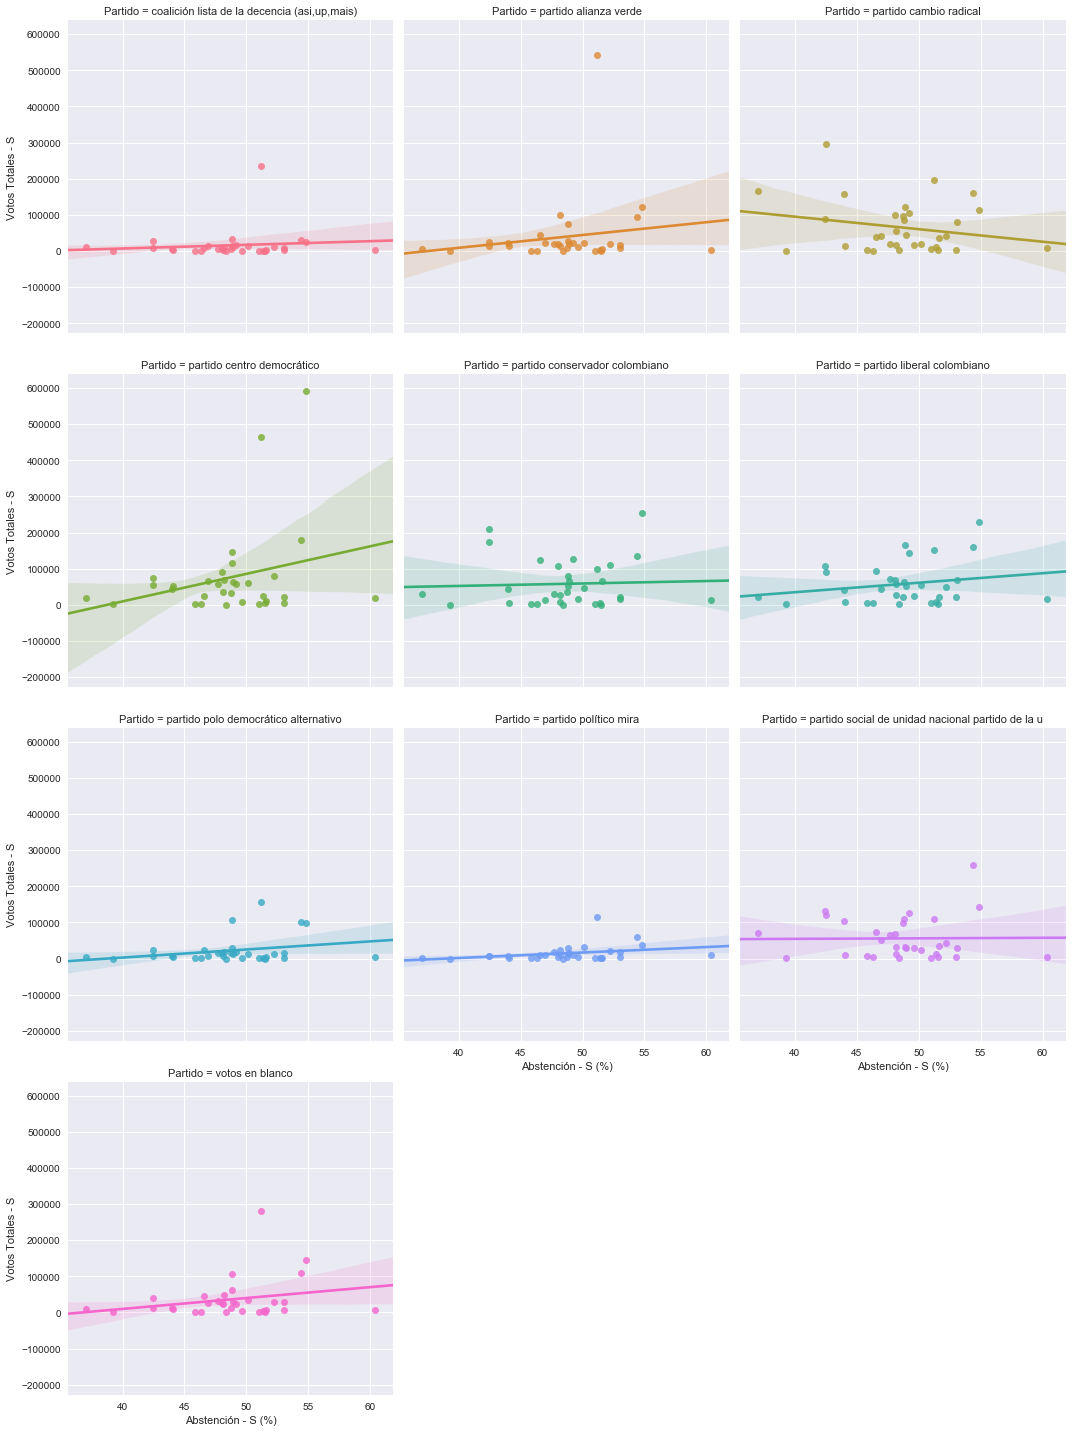

In [9]:
sns.lmplot(x='Abstención - S (%)',y='Votos Totales - S',hue='Partido',col='Partido',data=df1,col_wrap=3)

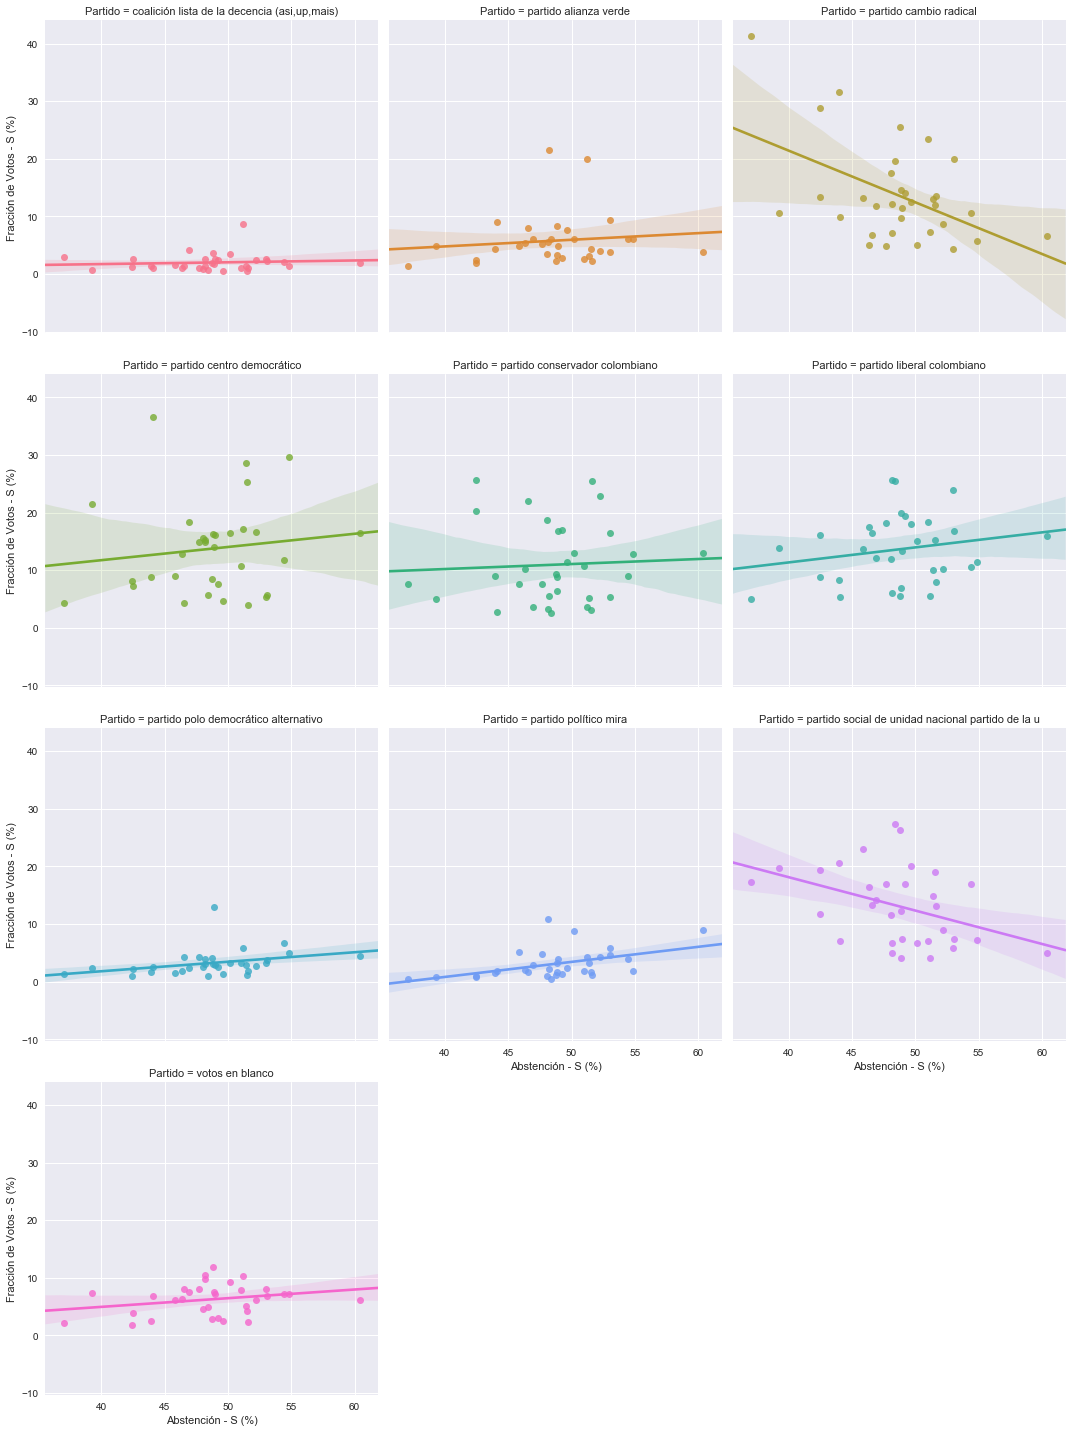

In [10]:
sns.lmplot(x='Abstención - S (%)',y='Fracción de Votos - S (%)',hue='Partido',col='Partido',data=df1,col_wrap=3)

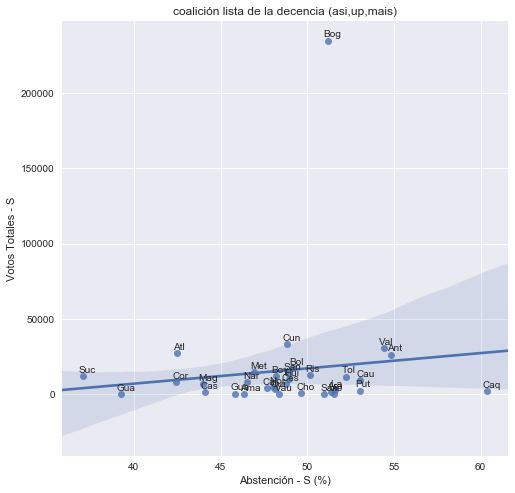

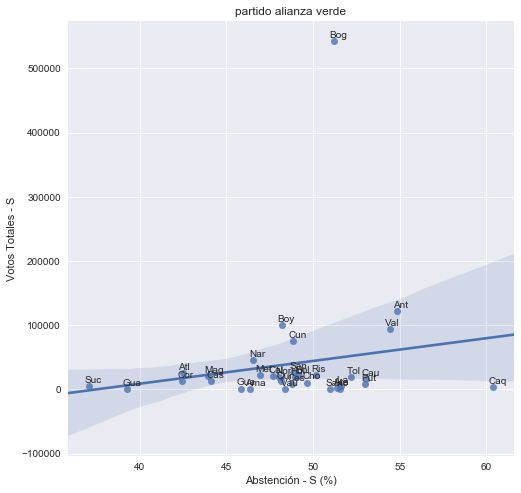

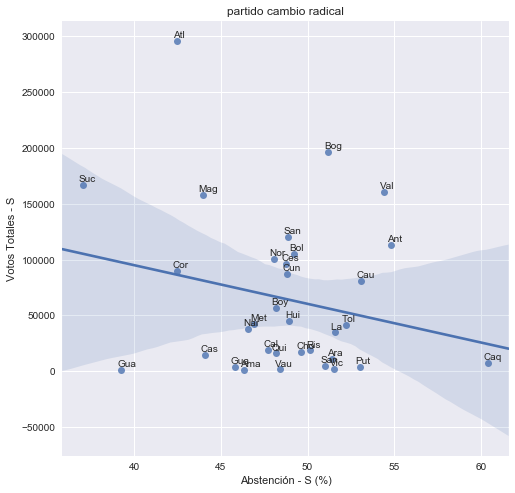

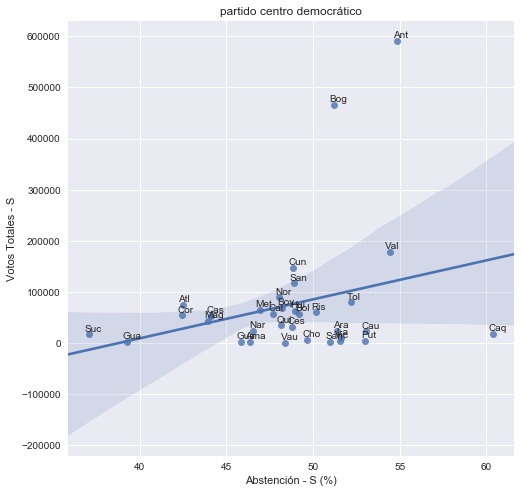

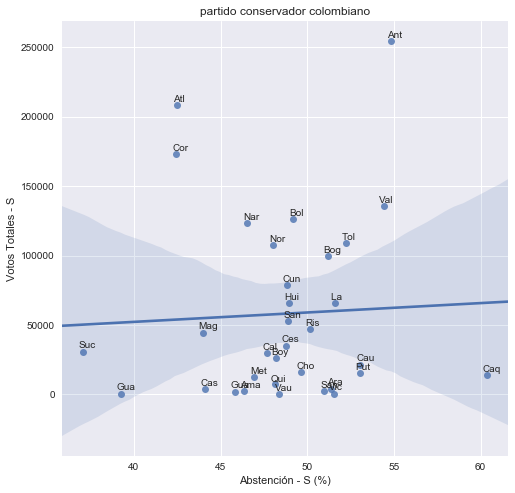

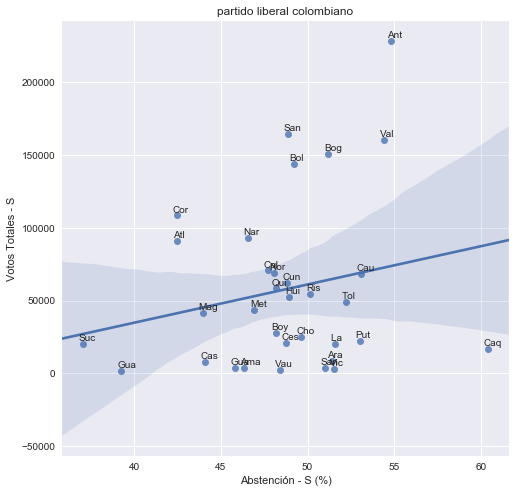

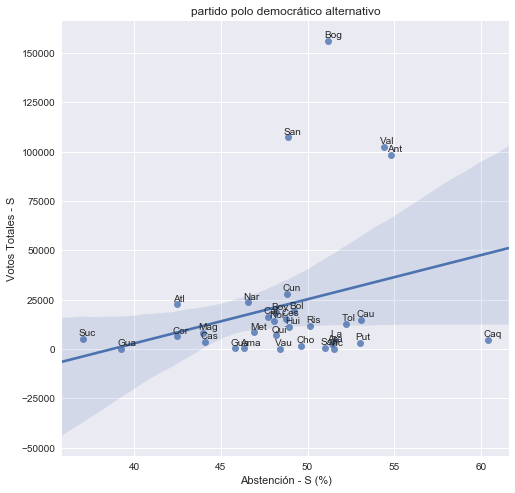

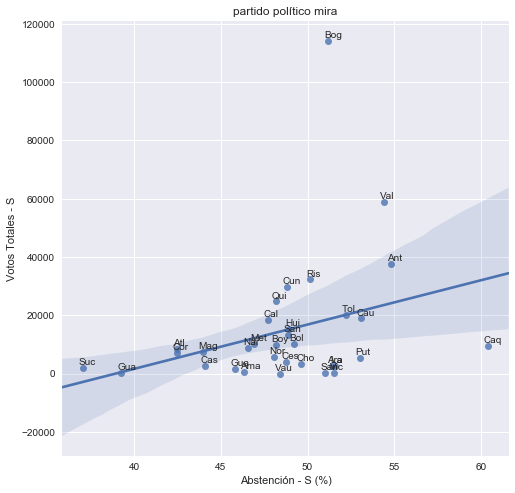

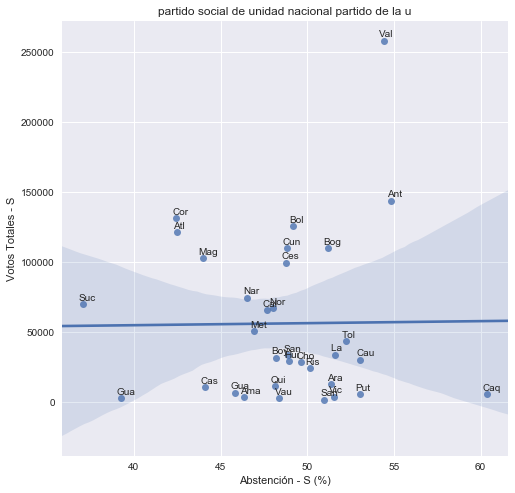

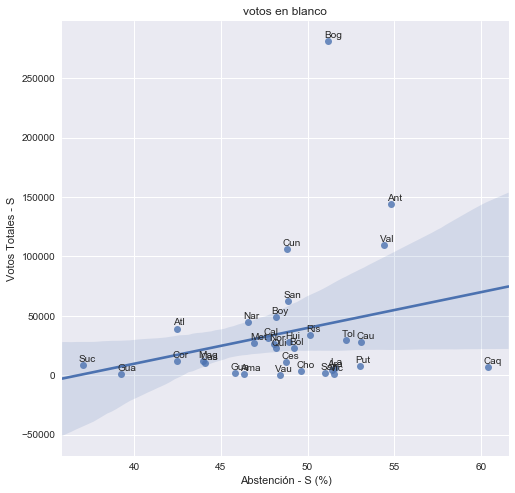

In [11]:
for k in np.unique(df1['Partido']):
    dfsel=df1[df1['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - S (%)',y='Votos Totales - S',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - S (%)'].iloc[i]-0.25,dfsel['Votos Totales - S'].iloc[i]+0.01*dfsel['Votos Totales - S'].max(),txt[0:3])
    ax.set_title(k)

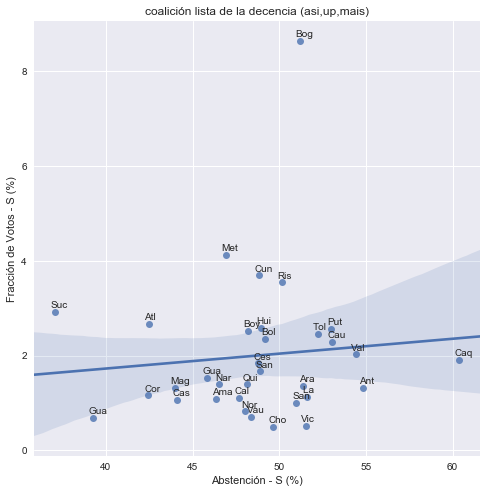

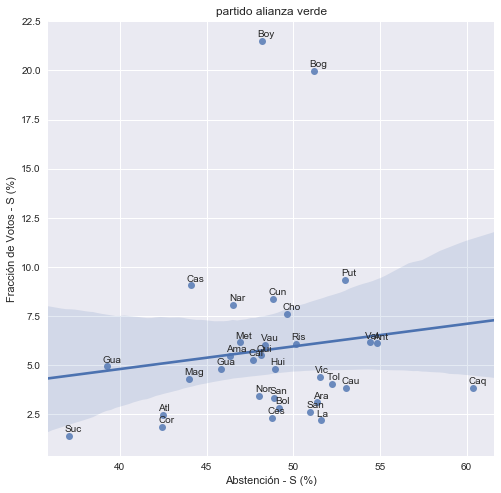

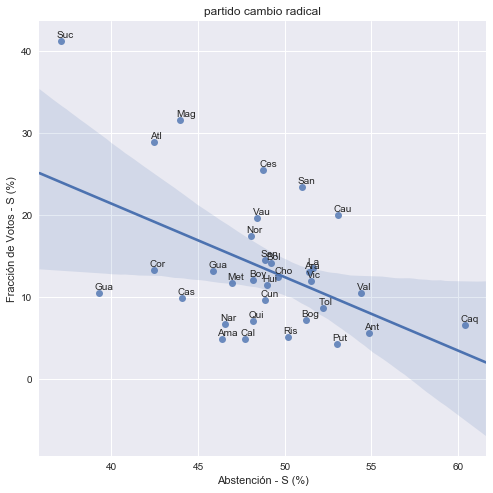

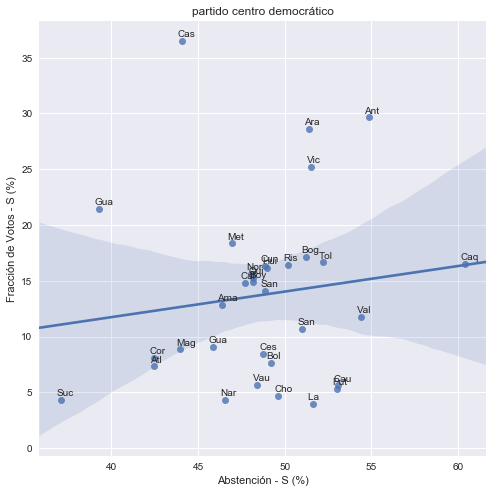

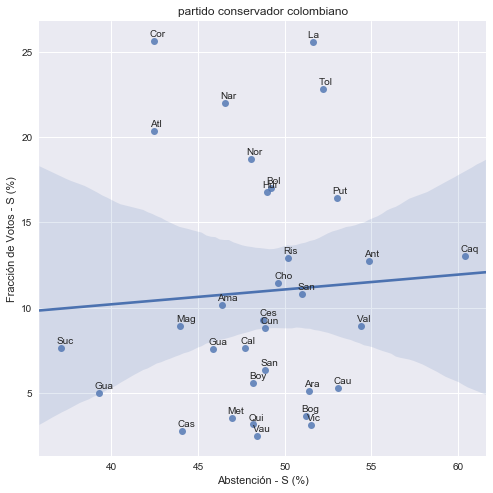

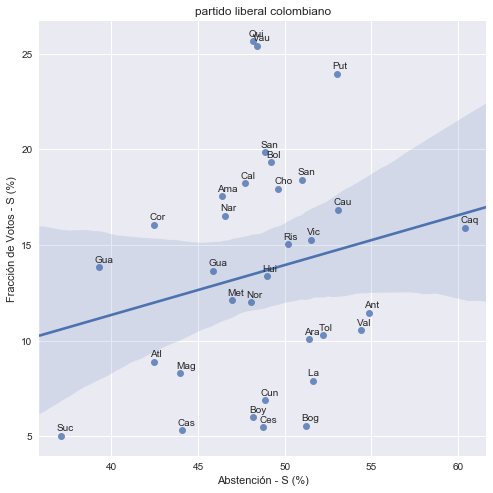

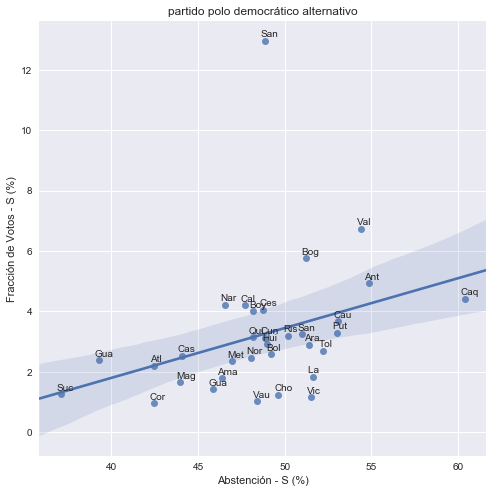

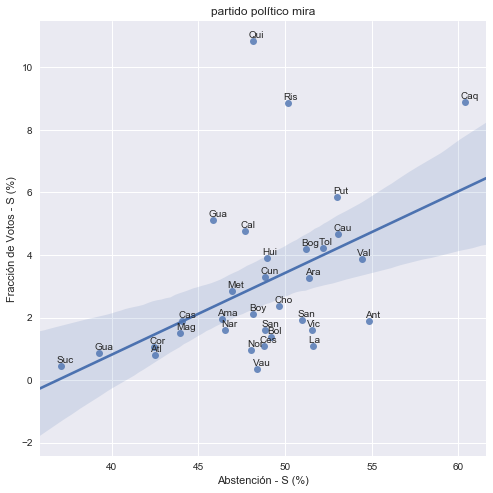

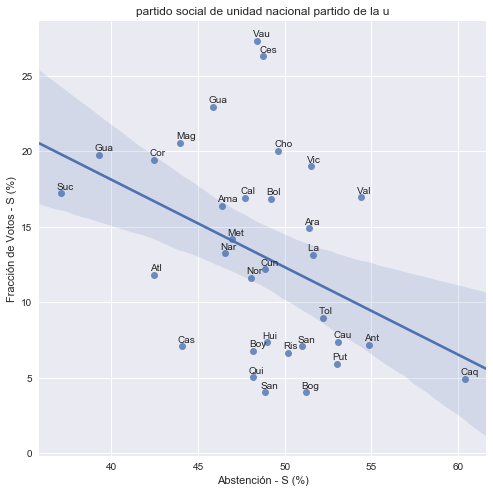

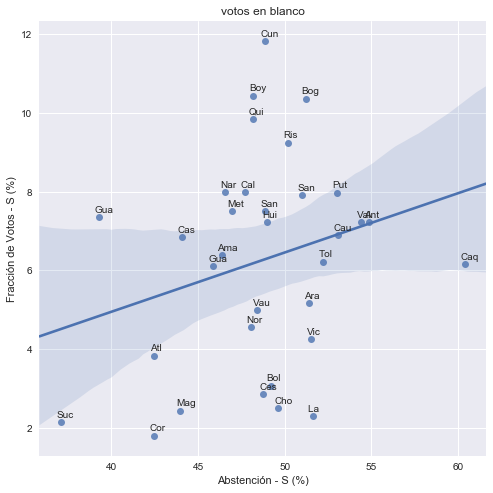

In [38]:
for k in np.unique(df1['Partido']):
    dfsel=df1[df1['Partido']==k] 
    fig, ax = plt.subplots(figsize=(8,8))
    gg=sns.regplot(x='Abstención - S (%)',y='Fracción de Votos - S (%)',data=dfsel, scatter=True)
    for i, txt in zip(range(len(dfsel)),dfsel.Departamento):
        gg.text(dfsel['Abstención - S (%)'].iloc[i]-0.25,dfsel['Fracción de Votos - S (%)'].iloc[i]+0.01*dfsel['Fracción de Votos - S (%)'].max(),txt[0:3])
    ax.set_title(k)

In [13]:
vtfc=[]
dabc=[]
vttc=[]
parc=[]
depc=[]
for p in plc:
    for i in dep:
        dc=cam[cam.departamento==i]
        adc=abstc[abstc.departamento==i]
        dabc+=[100*(1-adc.votantes.sum()/adc.habilitados.sum())]
        vtfc+=[100*(dc.candidato_votos[dc.partido==p]).sum()/(adc.votantes-adc.votos_no_marcados).sum()]
        vttc+=[(dc.candidato_votos[dc.partido==p]).sum()]
        parc+=[p]
        depc+=[i]

In [14]:
d_c = {'Departamento': depc, 'Abstención - C (%)': dabc, 'Votos Totales - C':vttc, 'Fracción de Votos - C (%)':vtfc,'Partido':parc}
df_c = pd.DataFrame(data=d_c)

In [15]:
df2=df_c[df_c['Departamento']!='Consulados']

In [16]:
plic=['coalición alternativa santandereana as',
      'coalición lista de la decencia (asi,up,mais)',
      'g.s.c. colombia justa libres',
      'movimiento alternativo indígena y social - mais',
      'coalición alternativa santandereana as',
      'partido alianza verde',
       'partido cambio radical', 'partido centro democrático',
       'partido conservador colombiano','partido liberal colombiano', 'partido opción ciudadana',
       'partido polo democrático alternativo', 'partido político mira',
       'partido social de unidad nacional partido de la u']

In [17]:
fil2=df2.Partido=='votos en blanco'
for i in plic:
    fil2|=df2.Partido==i
df2=df2[fil2]

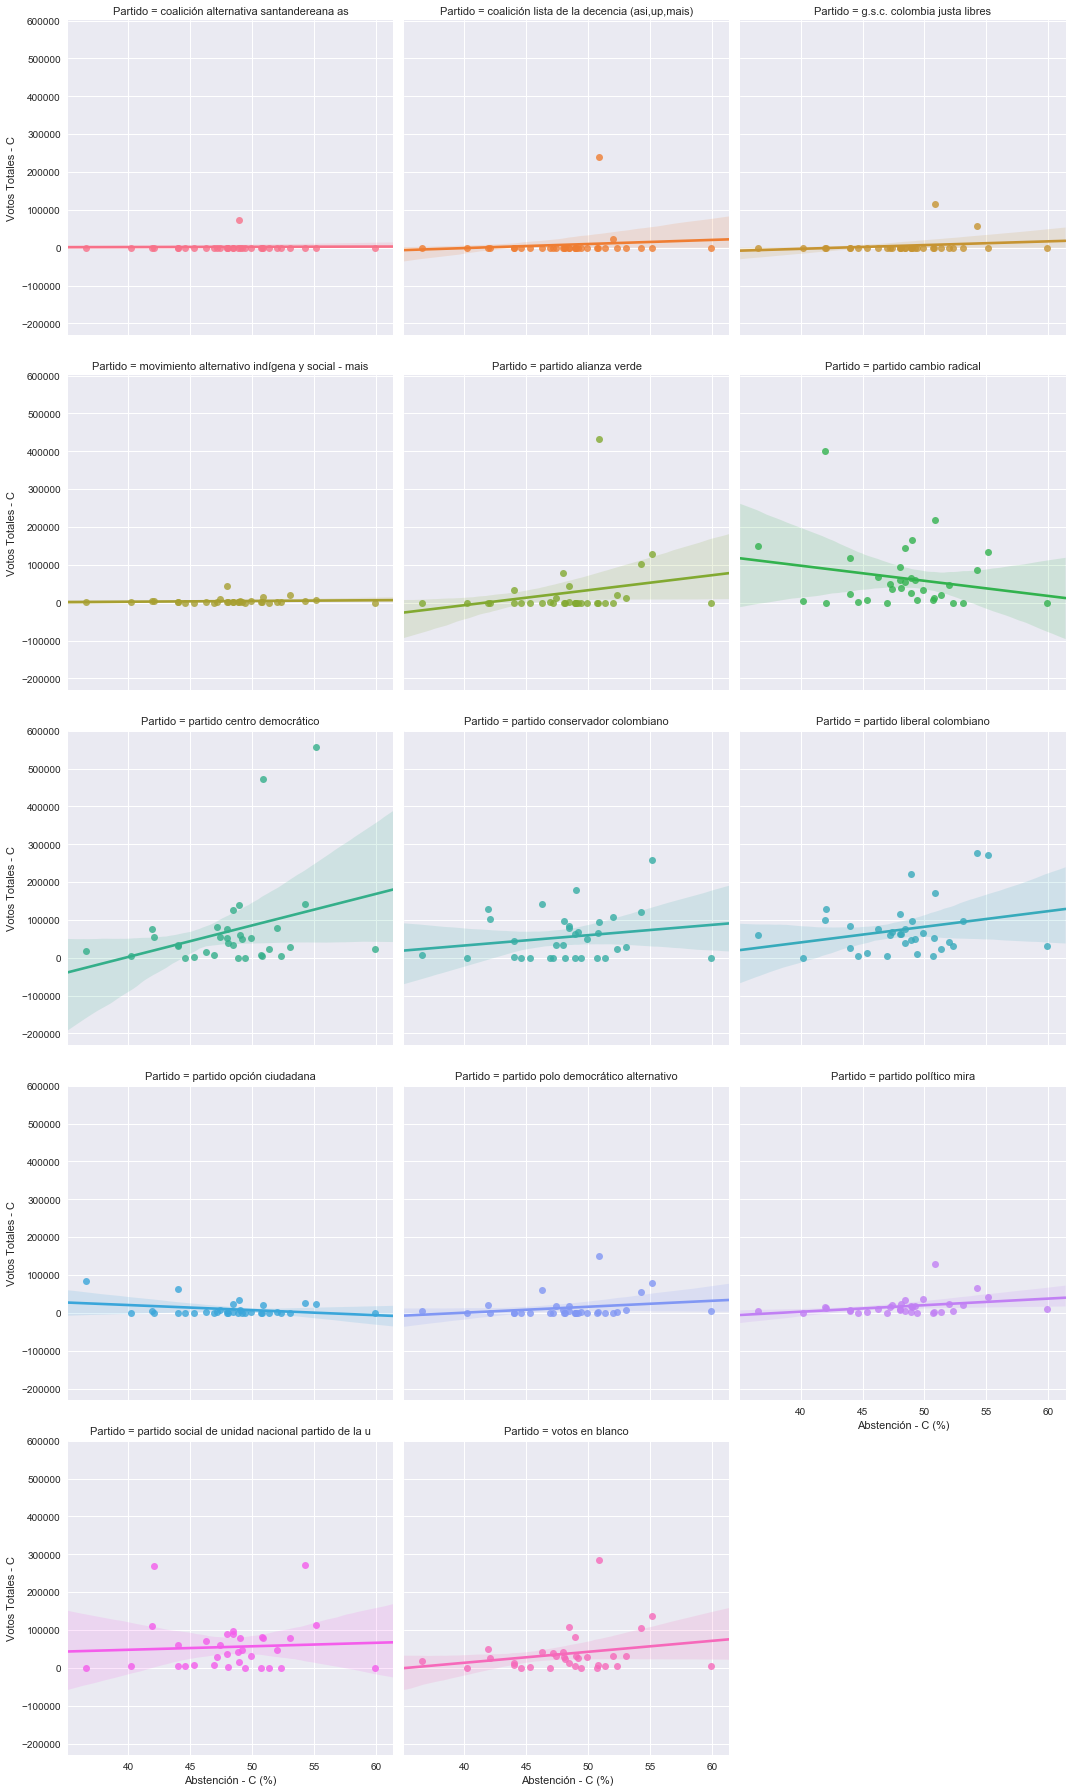

In [18]:
sns.lmplot(x='Abstención - C (%)',y='Votos Totales - C',hue='Partido',col='Partido',data=df2,col_wrap=3)

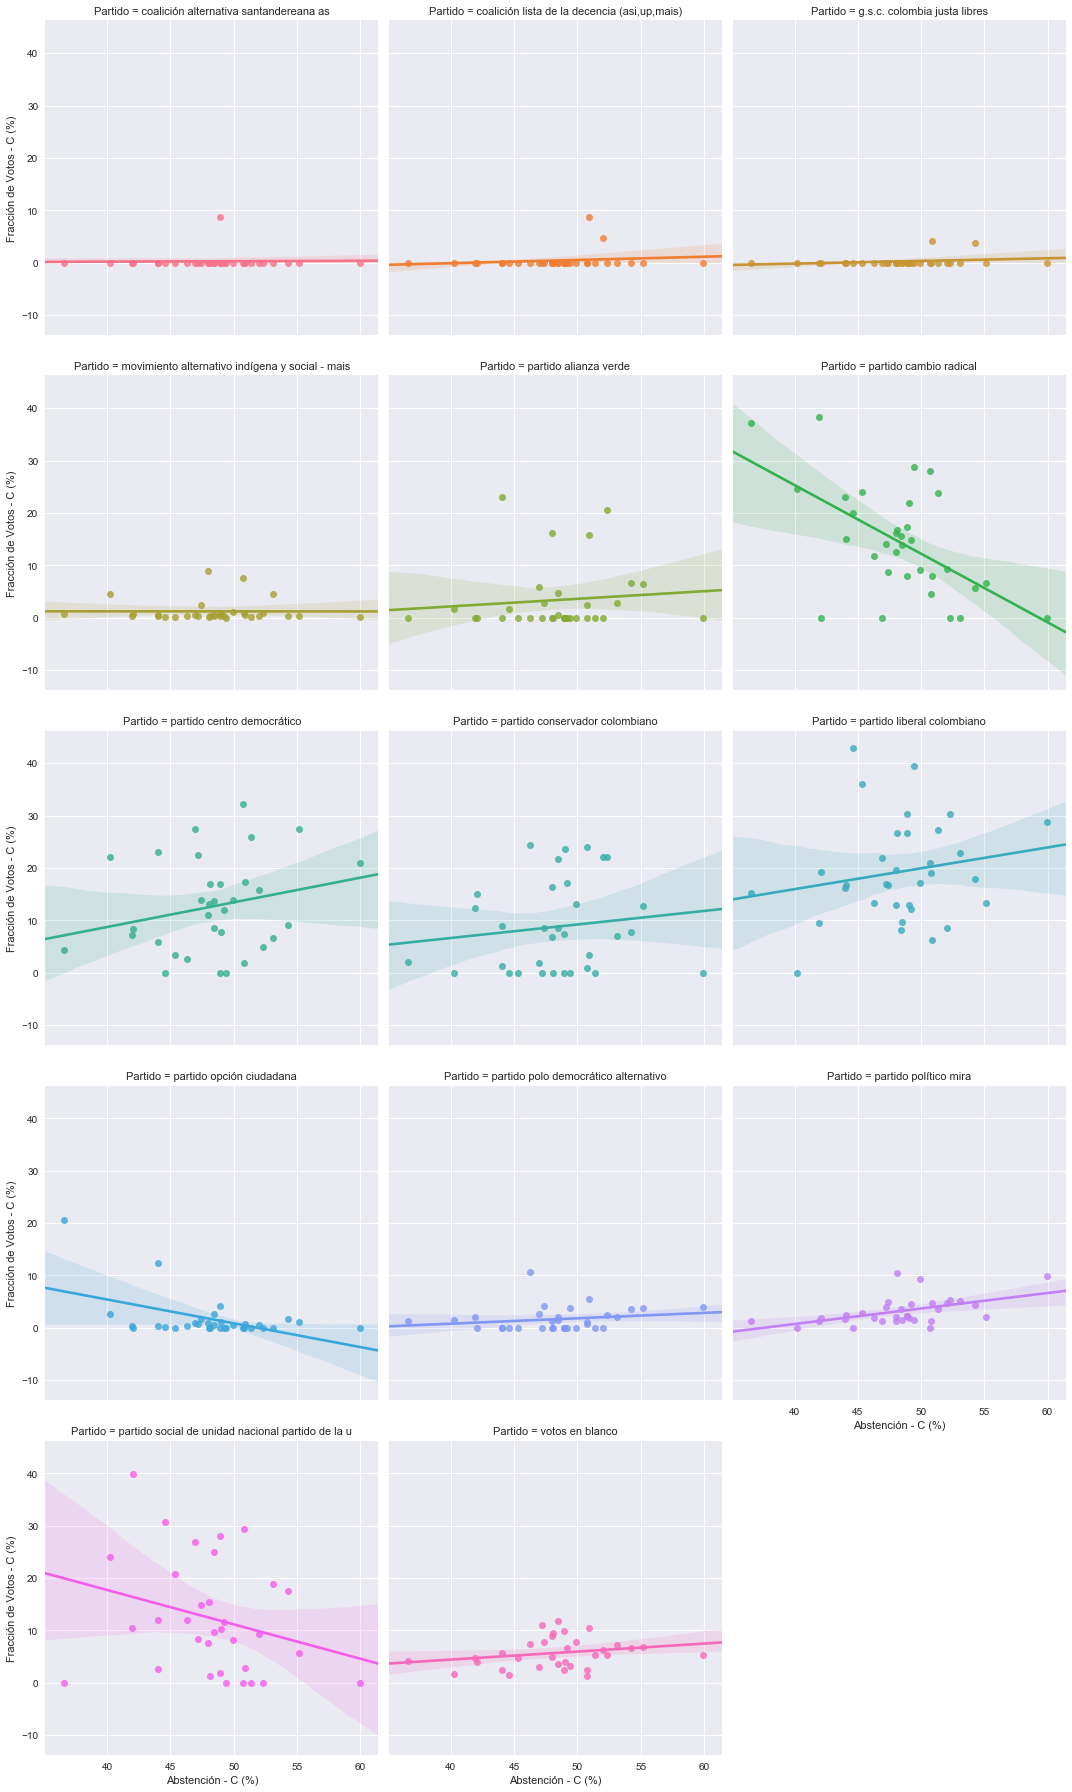

In [19]:
sns.lmplot(x='Abstención - C (%)',y='Fracción de Votos - C (%)',hue='Partido',col='Partido',data=df2,col_wrap=3)

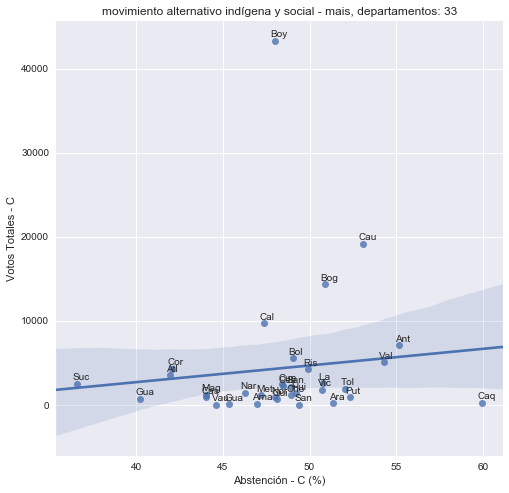

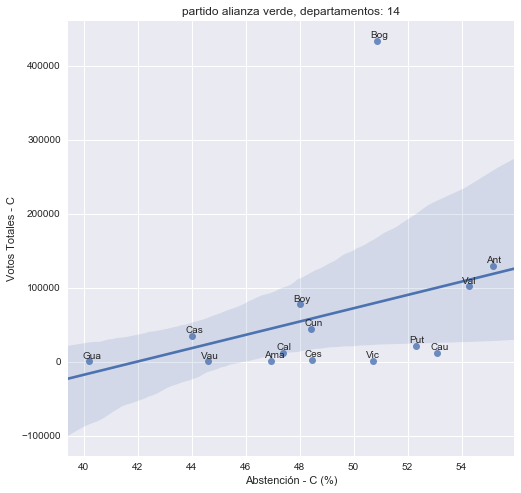

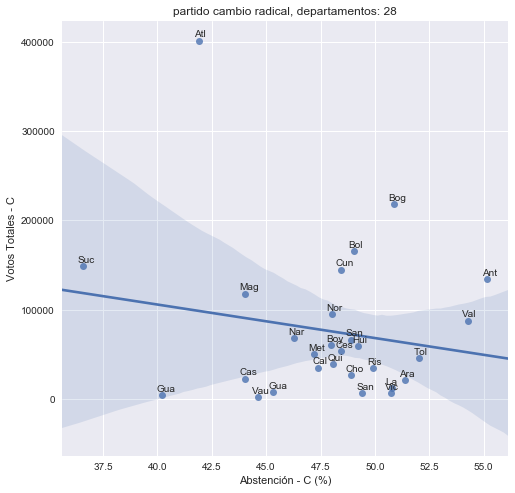

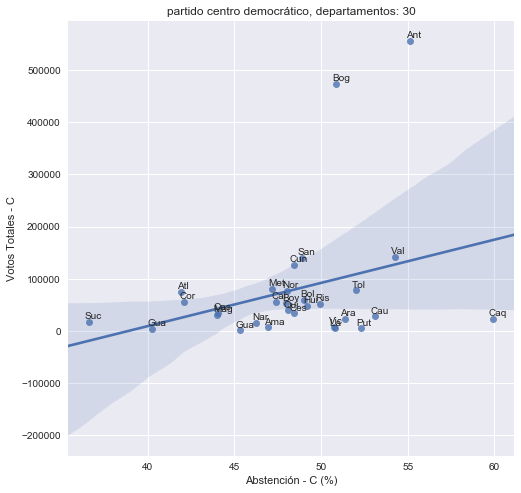

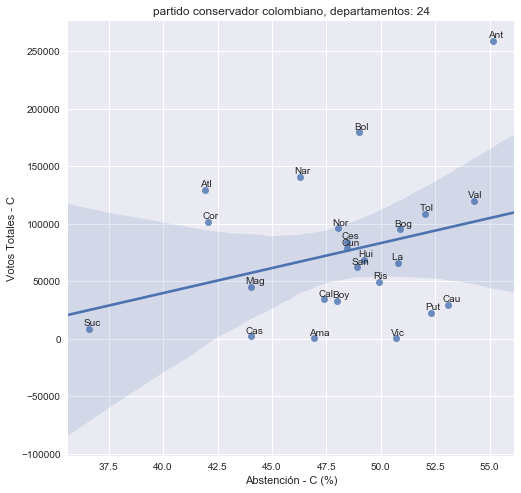

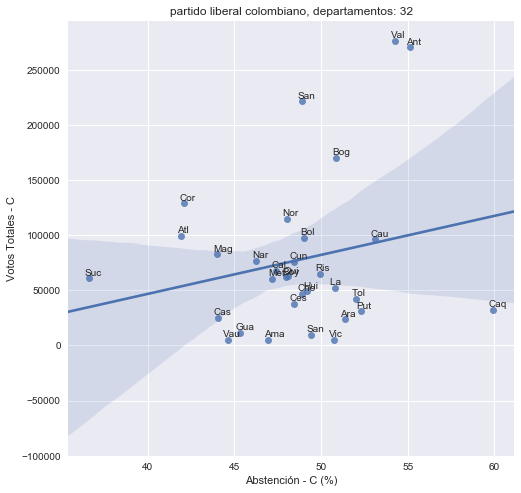

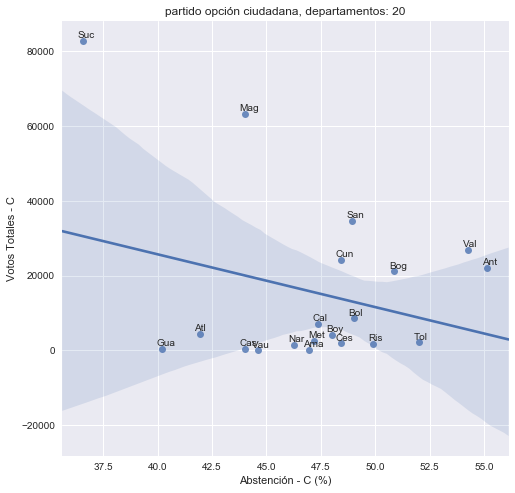

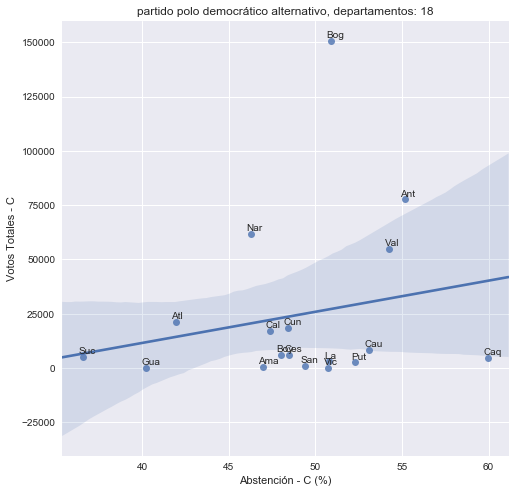

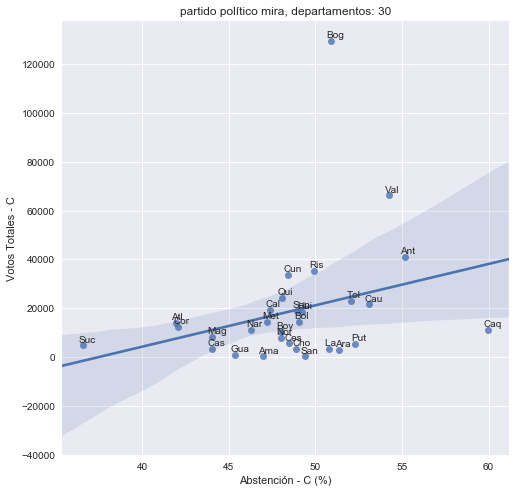

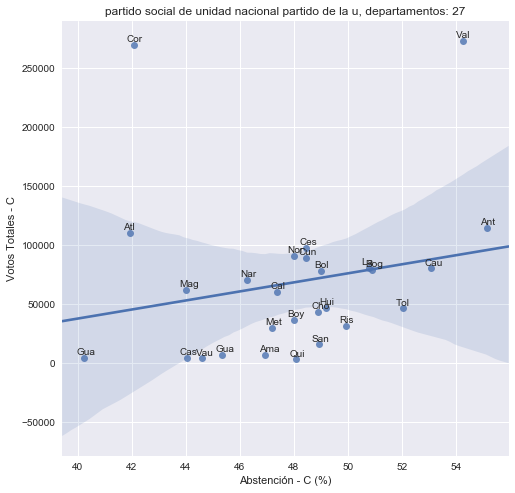

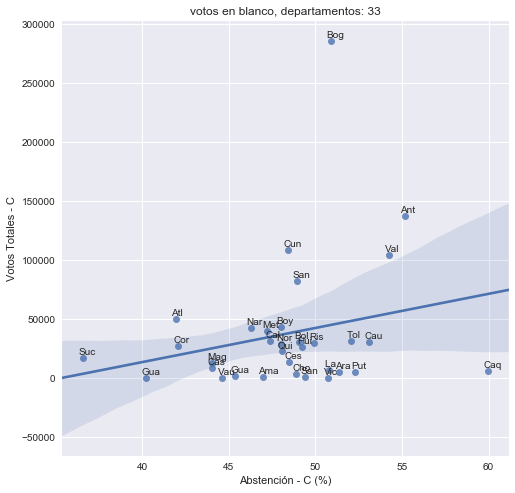

In [36]:
for k in np.unique(df2['Partido']):
    dfselc=df2[df2['Partido']==k] 
    dfselc=dfselc[dfselc['Votos Totales - C']>0]
    if len(dfselc)>2:
        fig, ax = plt.subplots(figsize=(8,8))
        gg=sns.regplot(x='Abstención - C (%)',y='Votos Totales - C',data=dfselc, scatter=True)
        for i, txt in zip(range(len(dfselc)),dfselc.Departamento):
            gg.text(dfselc['Abstención - C (%)'].iloc[i]-0.25,dfselc['Votos Totales - C'].iloc[i]+0.01*dfselc['Votos Totales - C'].max(),txt[0:3])
        ax.set_title(k+', departamentos: '+str(len(dfselc)))

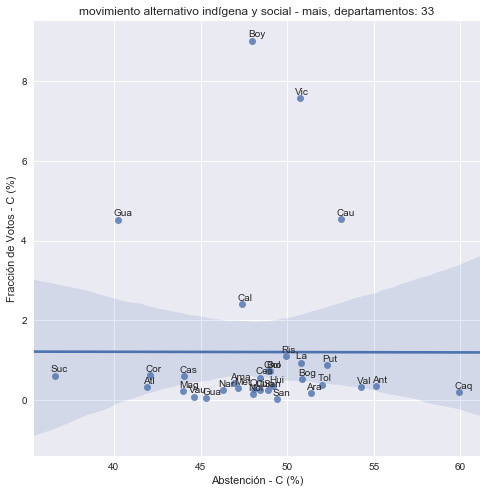

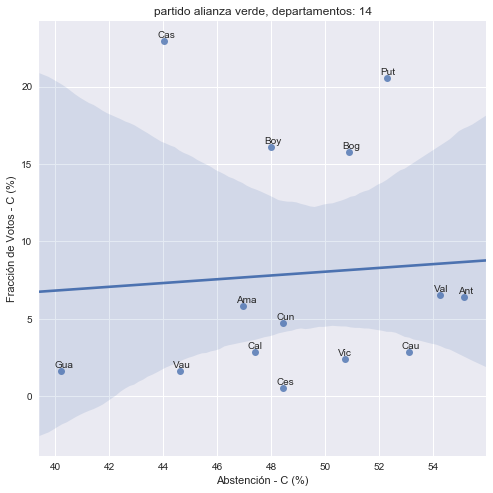

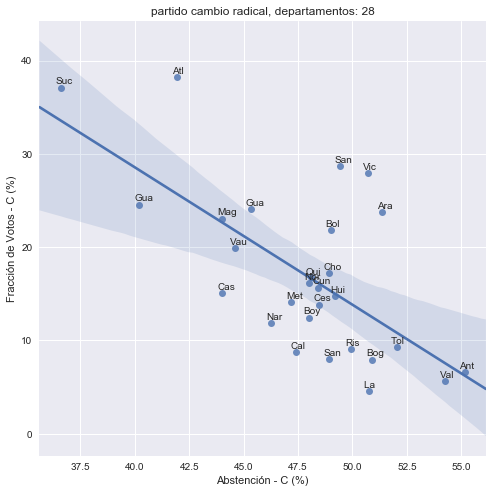

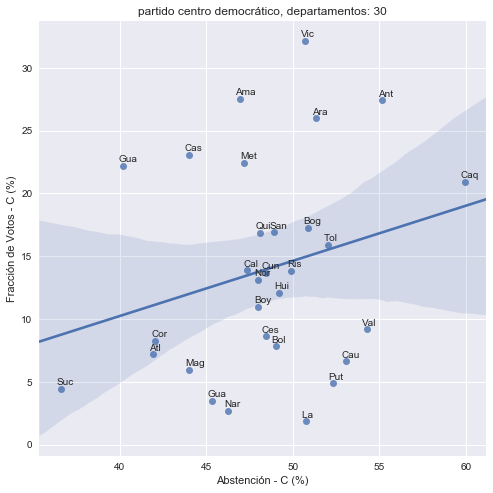

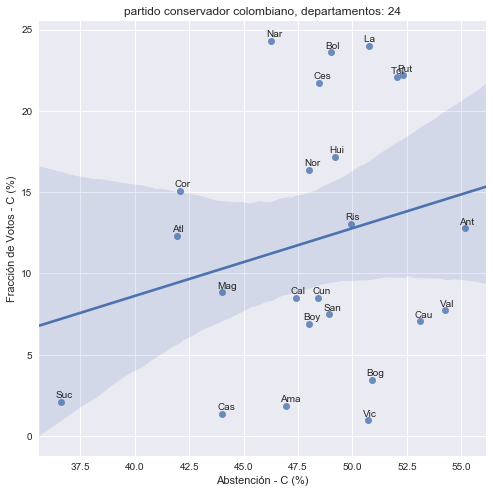

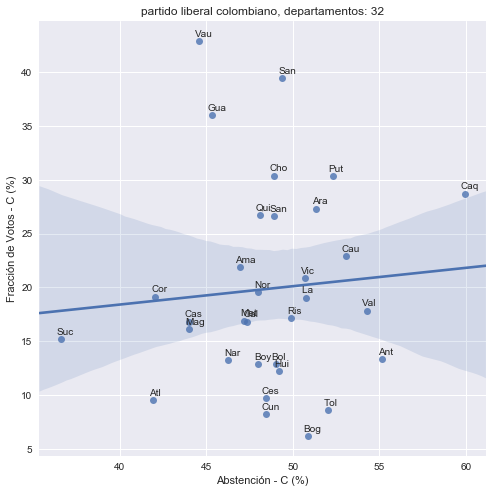

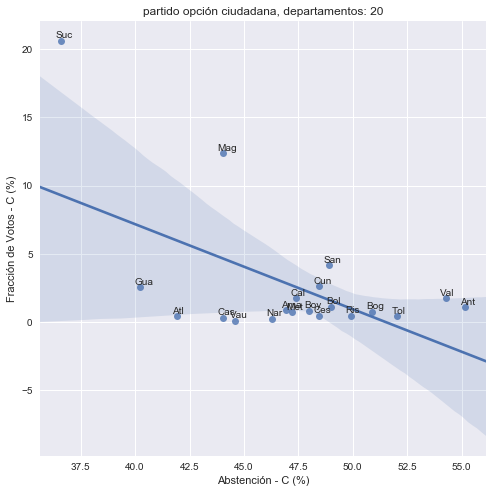

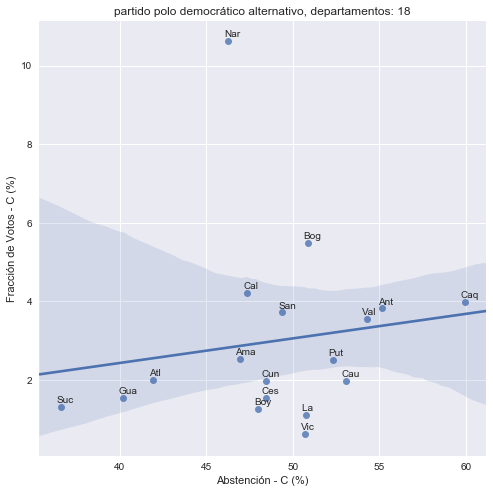

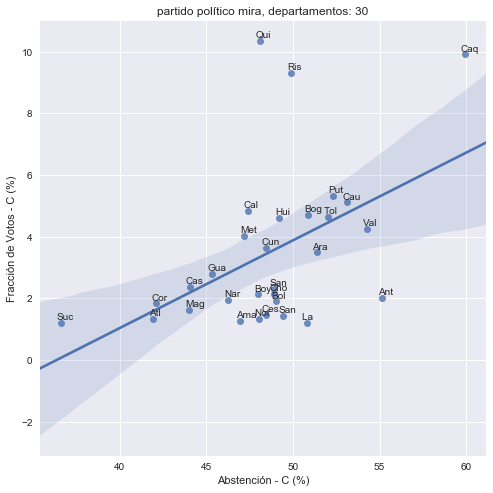

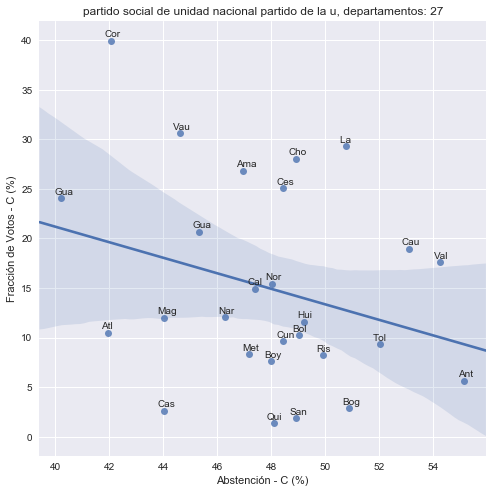

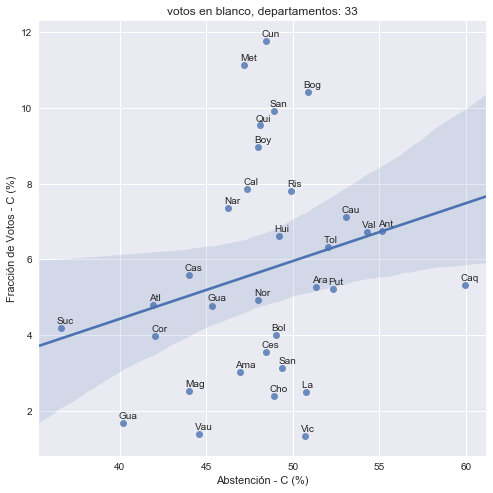

In [37]:
for k in np.unique(df2['Partido']):
    dfselc=df2[df2['Partido']==k] 
    dfselc=dfselc[dfselc['Votos Totales - C']>0]
    if len(dfselc)>2:
        fig, ax = plt.subplots(figsize=(8,8))
        gg=sns.regplot(x='Abstención - C (%)',y='Fracción de Votos - C (%)',data=dfselc, scatter=True)
        for i, txt in zip(range(len(dfselc)),dfselc.Departamento):
            gg.text(dfselc['Abstención - C (%)'].iloc[i]-0.25,dfselc['Fracción de Votos - C (%)'].iloc[i]+0.01*dfselc['Fracción de Votos - C (%)'].max(),txt[0:3])
        ax.set_title(k+', departamentos: '+str(len(dfselc)))

In [42]:
print(len(dfselc))
dfselc


33


,Abstención - C (%),Departamento,Fracción de Votos - C (%),Partido,Votos Totales - C
2414,46.942585,Amazonas,3.025681,votos en blanco,734
2415,55.155621,Antioquia,6.758114,votos en blanco,137225
2416,51.359900,Arauca,5.273822,votos en blanco,4607
2417,41.937493,Atlantico,4.788529,votos en blanco,50282
2418,50.877474,Bogotá D.C.,10.413821,votos en blanco,285958
2419,49.020152,Bolivar,4.013397,votos en blanco,30533
2420,47.999118,Boyaca,8.959724,votos en blanco,43090
2421,47.383626,Caldas,7.857102,votos en blanco,31519
2422,59.933688,Caqueta,5.332166,votos en blanco,5970
2423,44.026361,Casanare,5.599792,votos en blanco,8411


In [39]:
dfsel

,Abstención - S (%),Departamento,Fracción de Votos - S (%),Partido,Votos Totales - S
782,46.348266,Amazonas,6.392758,votos en blanco,1363
783,54.842510,Antioquia,7.218031,votos en blanco,143985
784,51.385721,Arauca,5.170699,votos en blanco,4315
785,42.477893,Atlantico,3.831494,votos en blanco,39273
786,51.195032,Bogotá D.C.,10.368216,votos en blanco,281687
787,49.202925,Bolivar,3.070929,votos en blanco,22812
788,48.175447,Boyaca,10.442650,votos en blanco,48664
789,47.692680,Caldas,7.988446,votos en blanco,30974
790,60.388243,Caqueta,6.159727,votos en blanco,6542
791,44.081310,Casanare,6.848309,votos en blanco,9981


In [66]:
rin=np.ones(33)
rin[::2]=rin[::2]*-1

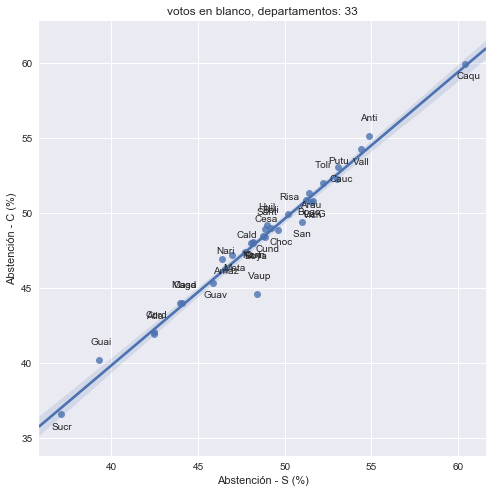

In [76]:
fig, ax = plt.subplots(figsize=(8,8))
gg=sns.regplot(dfsel['Abstención - S (%)'],dfselc['Abstención - C (%)'])
for i, txt, ix in zip(range(len(dfselc)),dfselc.Departamento,rin):
    gg.text(dfsel['Abstención - S (%)'].iloc[i]-0.5,dfselc['Abstención - C (%)'].iloc[i]+ix*0-8,txt[0:4])
ax.set_title(k+', departamentos: '+str(len(dfselc)))

In [77]:
dfpr=pd.read_csv('primera_vuelta_presidencial.csv')

In [78]:
dfpr.head()

,código,municipio,departamento,mesas,total_mesas,votantes,total_votantes,votos_por_candidato,votos_en_blanco,votos_nulos,votos_no_marcados,iván duque,gustavo petro,sergio fajardo,germán vargas lleras,humberto de la calle,promotores voto en blanco,viviane morales,jorge antonio trujillo sarmiento
0,60010,El Encanto,Amazonas,3,3,308,776,303,3,2,0,50,190,14,39,8,0,1,1
1,60013,La Chorrera,Amazonas,3,3,565,969,557,3,1,4,44,470,15,19,7,2,0,0
2,60016,La Pedrera,Amazonas,3,3,231,965,229,0,2,0,21,150,20,29,9,0,0,0
3,60017,La Victoria,Amazonas,1,1,19,61,18,1,0,0,2,14,1,0,1,0,0,0
4,60001,Leticia,Amazonas,97,97,14555,36216,14136,259,123,37,6154,3821,2523,853,652,17,43,73


In [79]:
dep=np.unique(dfpr.departamento)

In [ ]:
d_s = {'Departamento': deps, 'Abstención - S (%)': dabs, 'Votos Totales - S':vtts, 'Fracción de Votos - S (%)':vtfs,'Partido':pars}
df_s = pd.DataFrame(data=d_s)

In [91]:
abp=[]
tv=[]
vdq=[]
vpt=[]
vfj=[]
vvl=[]
vky=[]
for i in dep:
    dummy=dfpr[dfpr.departamento==i]
    abp+=[100*(dummy.total_votantes-dummy.votantes).sum()/dummy.total_votantes.sum()]
    tv+=[dummy.total_votantes.sum()]
    vdq+=[dummy['iván duque'].sum()]
    vpt+=[dummy['gustavo petro'].sum()]
    vfj+=[dummy['sergio fajardo'].sum()]
    vvl+=[dummy['germán vargas lleras'].sum()]
    vky+=[dummy['humberto de la calle'].sum()]

In [92]:
len(vdq)

34

In [94]:
datp = {'Departamento': dep, 'Abstención':abp,'Votos totales':tv,'Duque':vdq,'Petro':vpt,'Fajardo':vfj,'De la Calle':vky,'Vargas Lleras':vvl}

In [95]:
dp=pd.DataFrame(data=datp)

In [98]:
dp['Abstención']*dp['Votos totales']

,Abstención,De la Calle,Departamento,Duque,Fajardo,Petro,Vargas Lleras,Votos totales
0,60.432952,739,Amazonas,7114,2693,5931,1295,46564
1,44.618924,59974,Antioquia,1367745,731609,238440,99642,4726629
2,52.247728,1588,Arauca,49415,12036,17824,3336,187189
3,53.305456,16728,Atlantico,234045,85634,331687,171968,1868411
4,35.033584,93830,Bogotá D.C.,983931,1240799,1098478,172158,5702805
5,58.808340,10304,Bolivar,256732,55468,242378,52111,1550644
6,40.612792,10647,Boyaca,225146,148029,122686,29967,944530
7,41.915306,14322,Caldas,190557,161420,34694,30784,782862
8,53.727677,2675,Caqueta,67884,21157,29965,3497,286586
9,34.478788,1473,Casanare,107131,38047,23130,3445,276164


In [99]:
(dp['Abstención']*dp['Votos totales'])

0       2814000.0
1     210897100.0
2       9780200.0
3      99596500.0
4     199789700.0
5      91190800.0
6      38360000.0
7      32813900.0
8      15397600.0
9       9521800.0
10     47241600.0
11     38038700.0
12     18920800.0
13    109632400.0
14     63467000.0
15     67639200.0
16      1727200.0
17      3271300.0
18     36069000.0
19     38028700.0
20     51464600.0
21     27114300.0
22     58466500.0
23     52960200.0
24     11597400.0
25     20238200.0
26     33872800.0
27      3571300.0
28     66932800.0
29     32705000.0
30     47413400.0
31    169465500.0
32      1475700.0
33      3247400.0
dtype: float64